# <center> EXploratory Data Analysis - Cardio Vascular Disease

In [1]:
## importing librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [10]:
df = pd.read_csv('../../mlcourse.ai/mlcourse.ai-master/data/mlbootcamp5_train.csv', sep=';')
df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0


In [11]:
df.shape

(70000, 13)

In [12]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


/home/tam/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/tam/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


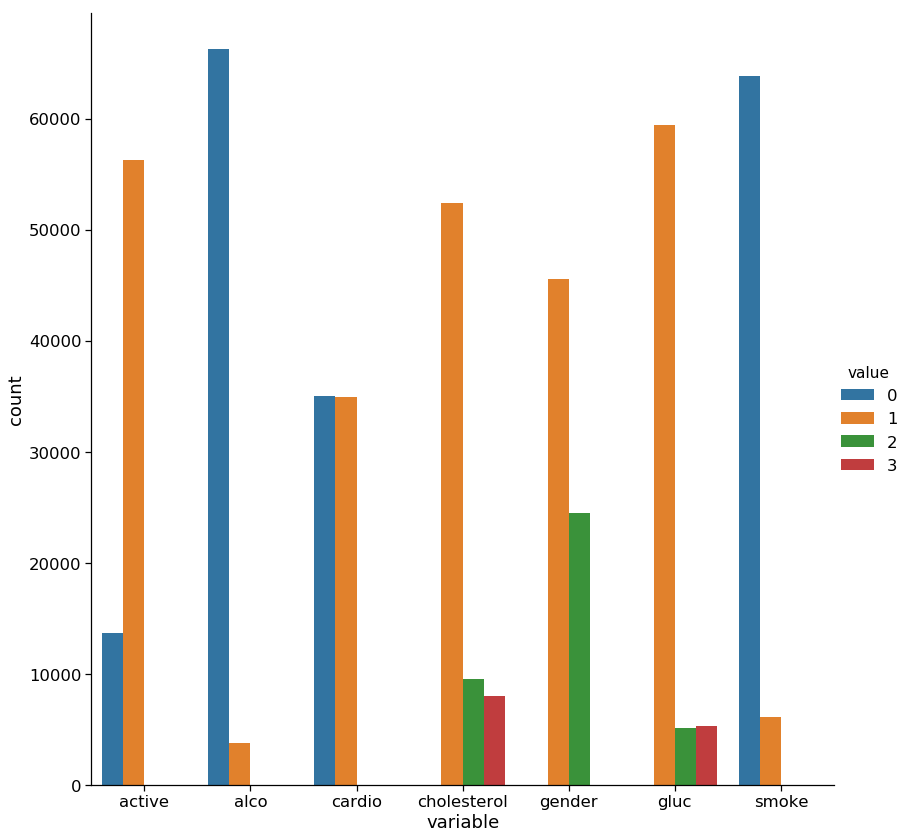

In [17]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

/home/tam/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/tam/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


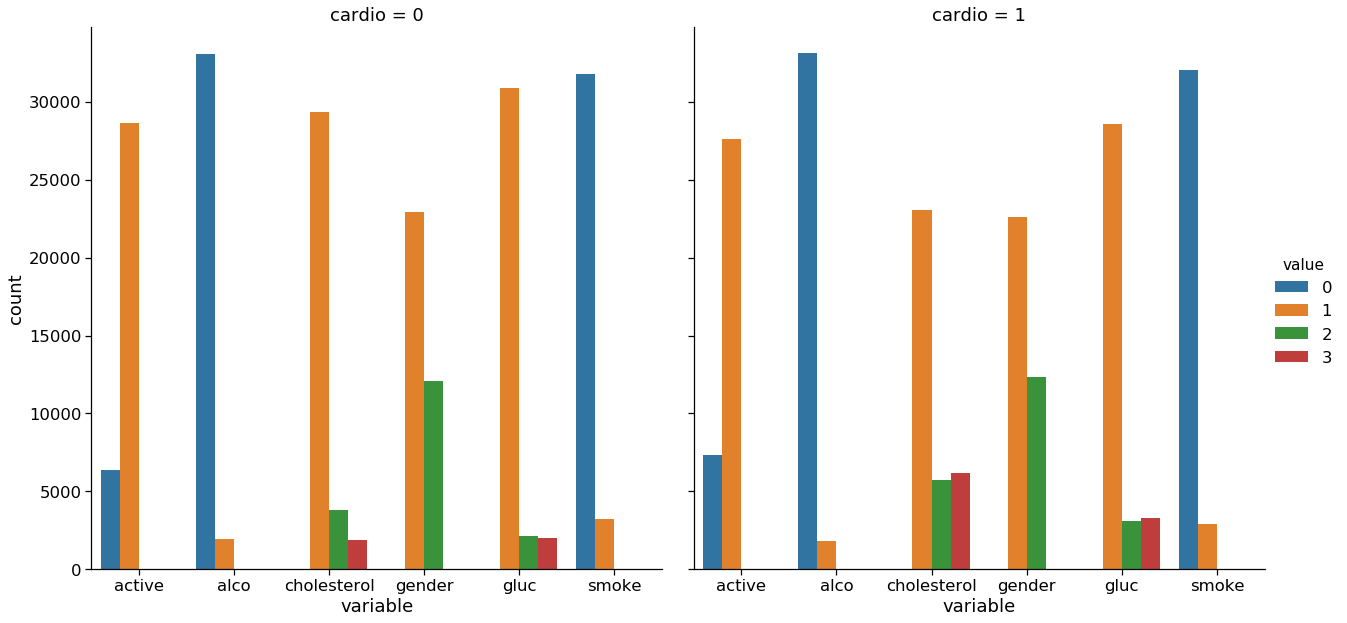

In [18]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

We can see that the distribution of cholesterol and glucose levels great differs by the value of the target variable. Is this a coincidence?

Now, let's calculate some statistics for the feature unique values:

In [22]:
for i in df.columns:
    n = df[i].nunique()
    print(i)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10* '-')
    

id
70000
----------
age
8076
----------
gender
2 [(0, 35021), (1, 34979)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(0, 35021), (1, 34979)]
----------
gluc
3 [(0, 35021), (1, 34979)]
----------
smoke
2 [(0, 35021), (1, 34979)]
----------
alco
2 [(0, 35021), (1, 34979)]
----------
active
2 [(0, 35021), (1, 34979)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


Question 1.1. 
(1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

45530 women and 24470 men
45530 men and 24470 women
45470 women and 24530 men
45470 men and 24530 women

In [36]:
count_men_women = df['gender'].value_counts()
print('{} man and {} women'.format(count_men_women.iloc[0], count_men_women.iloc[1]))


45530 man and 24470 women


Question 1.2. (1 point). Which gender more often reports consuming alcohol - men or women?

women
men

In [37]:
df['alco'].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

Question 1.3. (1 point). What is the difference between the percentages of smokers among men and women (rounded)?

4
16
20
24

In [44]:
df.groupby('gender')['smoke'].mean()*100

gender
1     1.785636
2    21.888026
Name: smoke, dtype: float64

Question 1.4. (1 point). What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You'll need to figure out the units of feature age in this dataset.

5
10
15
20

In [46]:
df.groupby('smoke')['age'].median()/365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [48]:
(df[df['smoke']==0]['age'].median()-df[df['smoke']==1]['age'].median())/365.25*12

19.613963039014372

## 1.2. Risk maps
Task:
On the website for the European Society of Cardiology, a SCORE scale is provided. It is used for calculating the risk of death from a cardiovascular decease in the next 10 years. Here it is:

<img src = '../../mlcourse.ai/mlcourse.ai-master/img/SCORE2007-eng.png'>

Question: 1.5. calculate the fraction of ill people (with CVD) in two segments described above. What is the Quotient of the two fractions?


Clarifications:

Calculate age_years feature – rounded age in years. For this task, select people aged from 60 to 64 inclusive.
Cholesterol level categories in the figure and in our data are different. In the figure, the values of cholesterol feature are as follows: 4 mmol/l  →  1, 5-7 mmol/l  →  2, 8 mmol/l  →  3.

On the web site of European Society of Cardiology, a SCORE scale is given. It is used for calculating the risk of death from a cardiovascular decease in the next 10 years. Here it is:



Let's take a look at the upper-right rectangle showing a subset of smoking men aged from 60 to 65. (It's not obvious, but the values in figure represent the upper boundary).

We see a value 9 in the lower-left corner of the rectangle and 47 in the upper-right. This means that for people in this gender-age group whose systolic pressure is less than 120 the risk of a CVD is estimated to be 5 times lower than for those with the pressure in the interval [160,180)

In [55]:
df['age_years'] =  round(df['age']/365.25).astype('int')

The oldest people in the sample are aged 65. Coincidence? Don't think so! Let's select smoking men of age [60,64].

In [66]:
df[(df['gender']==2) & (df['age_years']>=60)
                    & (df['age_years']<65) & (df['smoke']==1) & (df['cholesterol']==1)
                    & (df['ap_hi']<120)]['cardio'].mean()

0.2631578947368421

In [67]:
df[(df['gender']==2) & (df['age_years']>=60)
                    & (df['age_years']<65) & (df['smoke']==1) & (df['cholesterol']==3)
                    & (df['ap_hi']<180) & (df['ap_hi']>=160)]['cardio'].mean()

0.8636363636363636

As a result, the difference is approximately 3-fold. Not 5-fold, as the SCORE scale tells us, but it's possible that the SCORE risk of CVD is nonlinearly dependent on the proportion of ill people in the given age group.

1.3 Analyzing BMI
Task:
    create new feature - body mass index. 
    To do this divide weight kgs by the square of heights in meters.
    Normal BMI values are said to be from 18.5 to 25

Question 1.6. (2 points). Choose the correct statements:.

Median BMI in the sample is within boundaries of normal values.

Women's BMI is on average higher then men's.

Healthy people have, on average, higher BMI than ill people.

In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women

In [70]:
df['BMI'] = df['weight']/(df['height']/100)**2

In [71]:
df['BMI'].median()

26.374068120774975

First statement is incorrect since median BMI exceeds the norm of 25 points.

In [72]:
df.groupby('gender')['BMI'].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

Seconds statement is correct – women's BMI is higher on average.

In [73]:
df.groupby('cardio')['BMI'].mean()

cardio
0    26.548175
1    28.566061
Name: BMI, dtype: float64

In [74]:
df.groupby(['gender','alco','cardio'])['BMI'].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797